In [61]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

xl_file = pd.ExcelFile("lausanne-appart.xlsx")

data =  np.array(xl_file.parse("Lausanne-appart")) # sheet name
x = data[:,0]
y = data[:,2]

In [62]:
n = len(x)
x_bias = np.ones((n,1))
x_matrice = np.reshape(x,(n,1))
X = np.append(x_matrice,x_bias,axis=1)
alpha = 0.0000001
epsilon = 0.000001

In [63]:
def sto_gradient_step(h,X,r,theta):
    return theta - (alpha) * (h(x[r])-y[r])*X

def J_theta(h):
    return np.sum(np.square(h(x)-y))/(2*n)

def stop(j_n_1, j):
    return not (j_n_1 -j)/j < epsilon  

In [64]:
r = np.random.randint(n)
thetas = np.array([0.0,0.0])
h = np.poly1d(thetas)
Js = []
Js.append(J_theta(h))

thetas[1]= sto_gradient_step(h,X[r,1],r,thetas[1])
thetas[0]= sto_gradient_step(h,X[r,0],r,thetas[0])
h = np.poly1d(thetas)
Js.append(J_theta(h))
i = 0
while(stop(Js[-2],Js[-1])):
    r = np.random.randint(n)
    thetas[1]= sto_gradient_step(h,X[r,1],r,thetas[1])
    thetas[0]= sto_gradient_step(h,X[r,0],r,thetas[0])
    
    h = np.poly1d(thetas)
    Js.append(J_theta(h))
    i += 1
print('number of iteration : ', i)

number of iteration :  1679


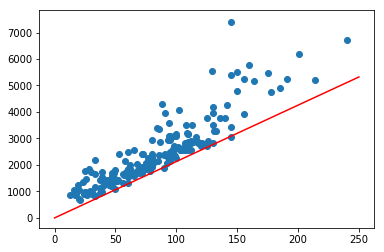

In [65]:
new_x = np.linspace(0, 250, 250)
new_y = h(new_x)
plt.plot(new_x, new_y, color="red")
plt.scatter(x,y)

In [66]:
print("Overall cost value: ", Js[-1])

Overall cost value:  371749.51957484457
